# Q1

Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with  exerience in x-axis and salary in y axis.

## a.
Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data = {
    "experience" : [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4],
    "salary" : [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2]
}
df = pd.DataFrame(data)
df.to_csv('salary.csv', index=False)
df

,experience,salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,2.4,3.7
5,2.5,4.2
6,2.8,4.4
7,3.1,6.1
8,3.3,5.4
9,3.7,5.7


In [23]:
n = len(df)
X = df['experience']
y = df['salary']

x_mean = np.mean(X)
y_mean = np.mean(y)

b1 = (np.sum((X-x_mean)*(y-y_mean)))/np.sum((X-x_mean)**2)
b0 = y_mean-x_mean*b1

print("b0: ", b0)
print("b1: ", b1)

b0:  -0.03563861094761833
b1:  1.5670982931135966


In [24]:
y_pred = b0 + b1*X
error = y-y_pred
y_pred_df = pd.DataFrame({'X': X, 'y': y, 'y_pred': y_pred, 'error': y-y_pred})
y_pred_df

,X,y,y_pred,error
0,1.2,1.7,1.844879,-0.144879
1,1.5,2.4,2.315009,0.084991
2,1.9,2.3,2.941848,-0.641848
3,2.2,3.1,3.411978,-0.311978
4,2.4,3.7,3.725397,-0.025397
5,2.5,4.2,3.882107,0.317893
6,2.8,4.4,4.352237,0.047763
7,3.1,6.1,4.822366,1.277634
8,3.3,5.4,5.135786,0.264214
9,3.7,5.7,5.762625,-0.062625


In [27]:
MSE = np.sum(error**2)/n
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  0.23366710810280555
RMSE:  0.48339125778483577


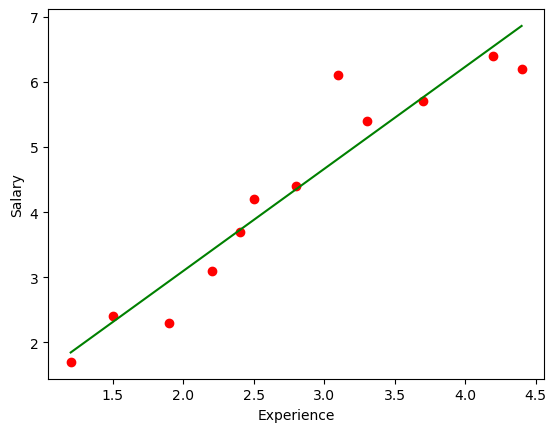

In [29]:
plt.plot(X, y_pred, color='green')
plt.scatter(X, y, color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

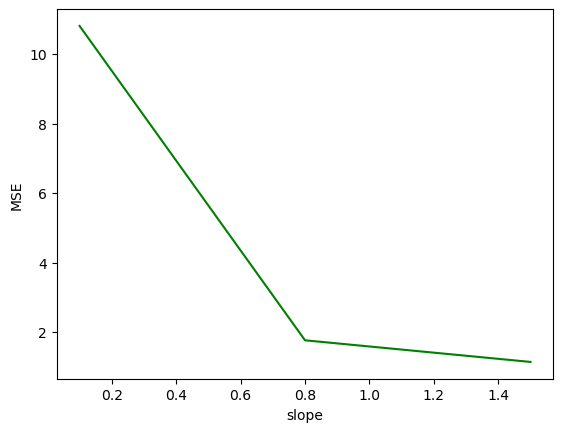

In [38]:
intercept = 1.1
slope = [0.1, 0.8, 1.5]
MSE_varied=[]

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    mse_new = np.sum((y-y_pred_new)**2/n)
    MSE_varied.append(mse_new)
    if mse_new<least_mse:
        least_mse = mse_new
        best_slope = slope[i]

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

## b.
Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE). 

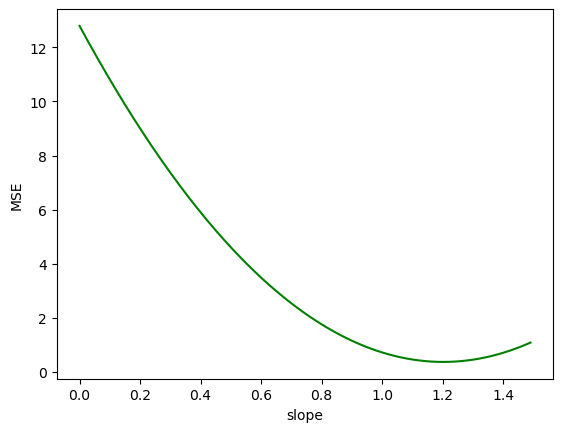

Best slope 1.2
Least MSE:  0.3752666666666666
Intercept:  0.9799999999999995


In [50]:
intercept = 1.1
slope = np.arange(0, 1.5, 0.01)
MSE_varied=[]
least_mse = 10**5
best_slope=0

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    mse_new = np.sum((y-y_pred_new)**2/n)
    MSE_varied.append(mse_new)
    if mse_new<least_mse:
        least_mse = mse_new
        best_slope = slope[i]

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

print("Best slope", best_slope)
print("Least MSE: ", least_mse)
print("Intercept: ", y_mean-x_mean*best_slope)

## c.
Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

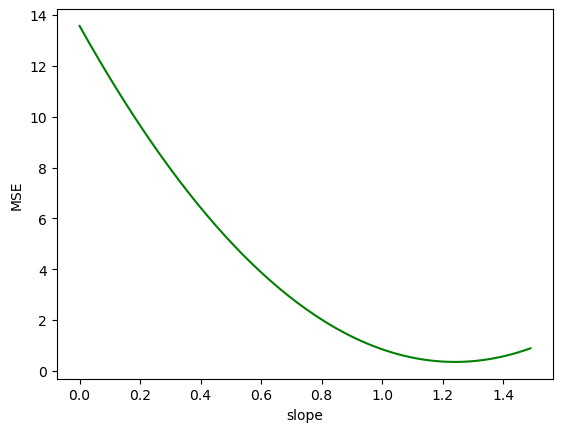

In [49]:
intercept = y_mean-x_mean*best_slope
slope = np.arange(0, 1.5, 0.01)
MSE_varied=[]

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    MSE_varied.append(np.sum((y-y_pred_new)**2/n))

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

## d. 
Use the scikit learn and compare the results of MSE.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

X = df[['experience']].values
X = df[['salary']].values

model.fit(X, y)

Sb0 = model.intercept_
Sb1 = model.coef_[0]

mse = mean_squared_error(y, y_pred)

print(f"b0: {Sb0}")
print(f"b1: {Sb1}")
print(f"MSE: {mse}")

b0: 1.7763568394002505e-15
b1: 0.9999999999999997
MSE: 0.23366710810280555
